#### Example queries from Multi-omic provider.

##### This jupyter notebook give an example to query data from mutation dependent drug response 
##### 

In [69]:
import requests

import pandas as pd
def Query_fields_DrugResponse_KP():
    query_str = "https://biothings.ncats.io/drug_response_kp/metadata/fields"
    response = requests.get(query_str)
    result = response.json()
    return(result)

def format_result_DrugResponse_KP(result):
    subject_id = []
    subject_symbol = []
    subject_type = []

    object_id = []
    object_name = []
    object_type = []

    edge_context = []
    edge_label = []
    edge_effect_size = []
    edge_ic50s_mut = []
    edge_ic50s_wt = []
    edge_median_ic50_mut = []
    edge_median_ic50_wt = []
    edge_provided_by = []
    edge_prevenence_publications = []
    edge_confidence_p = []
    edge_confidence_sample_size = []
    edge_confidence_mut_size = []
    edge_confidence_wt_size = []
    
    for i in range(0,len(result['hits'])):
        #Edges and context
        edge_context.append(result['hits'][i]['association']['context']['disease']['mondo'])
        edge_label.append(result['hits'][i]['association']['edge_label'])
        edge_effect_size.append(result['hits'][i]['association']['effect_size'])
        edge_ic50s_mut.append(result['hits'][i]['association']['ic50s_mut'])
        edge_ic50s_wt.append(result['hits'][i]['association']['ic50s_wt'])
        edge_median_ic50_mut.append(result['hits'][i]['association']['median_ic50_mut'])
        edge_median_ic50_wt.append(result['hits'][i]['association']['median_ic50_wt'])
        edge_provided_by.append(result['hits'][i]['association']['provided_by'])
        edge_prevenence_publications.append(result['hits'][i]['association']['publications'])
        edge_confidence_p.append(result['hits'][i]['association']['pvalue'])
        edge_confidence_sample_size.append(result['hits'][i]['association']['sample_size'])
        edge_confidence_mut_size.append(result['hits'][i]['association']['size_mut'])
        edge_confidence_wt_size.append(result['hits'][i]['association']['size_wt'])

        #Subject
        if 'NCBIGene' in result['hits'][i]['subject']:
            subject_id.append(result['hits'][i]['subject']['NCBIGene'])
        else:
            subject_id.append("")
            
        subject_symbol.append(result['hits'][i]['subject']['SYMBOL'])
        subject_type.append(result['hits'][i]['subject']['type'])

        #Object
        object_id.append(result['hits'][i]['object']['id'])
        object_name.append(result['hits'][i]['object']['name'])
        object_type.append(result['hits'][i]['object']['type'])

    #Generating dataFrame for the results
    result_df = pd.DataFrame({
    "subject_id":subject_id,
    "subject_symbol": subject_symbol,
    "subject_type": subject_type,
    "object_id":object_id,
    "object_name":object_name,
    "object_type":object_type,
    "edge_label": edge_label,
    "edge_context_disease": edge_context,
    "edge_confidence_p":edge_confidence_p,
    "edge_effect_size":edge_effect_size,
    "edge_median_ic50_wt":edge_median_ic50_wt,
    "edge_median_ic50_mut":edge_median_ic50_mut,
    "edge_confidence_sample_size":edge_confidence_sample_size,
    "edge_confidence_mut_size":edge_confidence_mut_size,
    "edge_confidence_wt_size":edge_confidence_wt_size})
    return(result_df)


def Query_DrugResponse_KP(Query):
    Query_str = "https://biothings.ncats.io/drug_response_kp/query?q="
    
    count = 0
    for i in Query:
        count = count + 1
        if count != len(Query):
            Query_str = Query_str + i + ":"+ Query[i] + "%20AND%20"
        else:
            Query_str = Query_str + i + ":"+ Query[i]+"&size=1000" ## Question: if I set the size to a large number, it will not return any results.
    print(Query_str)
    response = requests.get(Query_str)
    result = response.json()
    return(result)

#### Browse the field info in the KG

In [85]:
#Get to know the fields in the KG
meta_DrugResponse_KP = Query_fields_DrugResponse_KP()
#print(meta_DrugResponse_KP)
meta_DrugResponse_KP

{'association': {'index': True, 'type': 'object'},
 'association.context': {'index': True, 'type': 'object'},
 'association.context.disease': {'index': True, 'type': 'object'},
 'association.context.disease.id': {'index': True, 'type': 'keyword'},
 'association.context.disease.mondo': {'index': True, 'type': 'keyword'},
 'association.edge_label': {'index': True, 'type': 'keyword'},
 'association.effect_size': {'index': True, 'type': 'float'},
 'association.ic50s_mut': {'index': True, 'type': 'float'},
 'association.ic50s_wt': {'index': True, 'type': 'float'},
 'association.median_ic50_mut': {'index': True, 'type': 'float'},
 'association.median_ic50_wt': {'index': True, 'type': 'float'},
 'association.method': {'index': True, 'type': 'keyword'},
 'association.provided_by': {'index': True, 'type': 'keyword'},
 'association.publications': {'index': True, 'type': 'keyword'},
 'association.pvalue': {'index': True, 'type': 'float'},
 'association.sample_size': {'index': True, 'type': 'integ

####  Set up the query

In [90]:
#https://www.w3schools.com/tags/ref_urlencode.ASP

Query1 = {#"subject.SYMBOL":"EGFR",  #Query by gene symbol
         #"subject.id": "%22NCBIGene:4893%22" #Query by id
        # "association.effect_size": "%3C%2D1", #effect_size, %3C: <; %2D1: -1
         #"association.effect_size": "%3C0", #effect_size, %3C: <; %2D1: -1
         #"association.pvalue": "%3C0.05", ##p value from t-test 
         "association.context.disease.mondo": "%22MONDO:0005061%22", #Disease type
         #"association.median_ic50_mut":"%3C0", #The median value of IC50 in the mutated group
         #"association.median_ic50_wt":"%3C0"  ##The median value of IC50 in the wild type group
        # "object.name":"afatinib", #Query by drug
        }

#### Query data from the drug_response_kp

In [91]:
result = Query_DrugResponse_KP(Query1)  #Jason format
result_df = format_result_DrugResponse_KP(result) #Pandas DataFrame format
result_df.sort_values(by = ['edge_median_ic50_mut']) #View the results

https://biothings.ncats.io/drug_response_kp/query?q=association.context.disease.mondo:%22MONDO:0005061%22&size=1000


,subject_id,subject_symbol,subject_type,object_id,object_name,object_type,edge_label,edge_context_disease,edge_confidence_p,edge_effect_size,edge_median_ic50_wt,edge_median_ic50_mut,edge_confidence_sample_size,edge_confidence_mut_size,edge_confidence_wt_size
989,4921,DDR2,Gene,CHEBI:31550,Epothilone B,ChemicalSubstance,related_to,MONDO:0005061,0.271083,-0.584217,-4.958291,-6.558041,63,4,54
522,9938,ARHGAP25,Gene,CHEBI:31550,Epothilone B,ChemicalSubstance,related_to,MONDO:0005061,0.149275,-0.765533,-4.882790,-6.419942,63,4,54
310,905,CCNT2,Gene,PUBCHEM:148124,Docetaxel,ChemicalSubstance,related_to,MONDO:0005061,0.105860,-0.989882,-4.959422,-6.196330,63,3,49
183,9716,AQR,Gene,CHEBI:31550,Epothilone B,ChemicalSubstance,related_to,MONDO:0005061,0.327157,-0.469445,-4.905261,-5.863114,63,5,53
113,9938,ARHGAP25,Gene,PUBCHEM:49926,Thapsigargin,ChemicalSubstance,related_to,MONDO:0005061,0.133761,-0.797565,-4.642111,-5.856139,63,4,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,26057,ANKRD17,Gene,PUBCHEM:8249,Phenformin,ChemicalSubstance,related_to,MONDO:0005061,0.486181,0.269256,7.523374,8.091779,63,8,52
770,255119,C4orf22,Gene,PUBCHEM:65110,AICAR,ChemicalSubstance,related_to,MONDO:0005061,0.897574,-0.068468,8.086175,8.125922,63,4,48
747,88,ACTN2,Gene,PUBCHEM:8249,Phenformin,ChemicalSubstance,related_to,MONDO:0005061,0.392082,0.516151,7.611093,8.142196,63,3,57
390,144535,C12orf63,Gene,PUBCHEM:8249,Phenformin,ChemicalSubstance,related_to,MONDO:0005061,0.324845,0.383392,7.745685,8.188481,63,8,52


####  Set up the query 2

##### By querying the drug response KP, we found Afatinib show higher sensitivity to the EGFR mutated cancer cell lines in LUAD(MONDO:0005061). 

In [79]:
Query2 = {"subject.SYMBOL":"EGFR",  #Query by gene symbol
         #"subject.id": "%22NCBIGene:4893%22" #Query by id
        # "association.effect_size": "%3C%2D1", #effect_size, %3C: <; %2D1: -1
         #"association.effect_size": "%3C0", #effect_size, %3C: <; %2D1: -1
         #"association.pvalue": "%3C0.05", ##p value from t-test 
         "association.context.disease.mondo": "%22MONDO:0005061%22", #Disease type
        # "association.median_ic50_mut":"%3C0", #The median value of IC50 in the mutated group
         #"association.median_ic50_wt":"%3E0"  ##The median value of IC50 in the wild type group
        # "object.name":"Afatinib", #Query by drug
        }

In [80]:
result = Query_DrugResponse_KP(Query2)  #Jason format
result_df = format_result_DrugResponse_KP(result) #Pandas DataFrame format
result_df.sort_values(by = ['edge_median_ic50_mut']) #View the results

https://biothings.ncats.io/drug_response_kp/query?q=subject.SYMBOL:EGFR%20AND%20association.context.disease.mondo:%22MONDO:0005061%22&size=1000


,subject_id,subject_symbol,subject_type,object_id,object_name,object_type,edge_label,edge_context_disease,edge_confidence_p,edge_effect_size,edge_median_ic50_wt,edge_median_ic50_mut,edge_confidence_sample_size,edge_confidence_mut_size,edge_confidence_wt_size
219,1956,EGFR,Gene,CHEBI:31550,Epothilone B,ChemicalSubstance,related_to,MONDO:0005061,0.838759,0.079213,-4.958291,-5.490777,63,8,50
52,1956,EGFR,Gene,PUBCHEM:148124,Docetaxel,ChemicalSubstance,related_to,MONDO:0005061,0.952564,-0.026338,-5.184258,-5.339079,63,6,46
67,1956,EGFR,Gene,PUBCHEM:5311497,Vinorelbine,ChemicalSubstance,related_to,MONDO:0005061,0.644264,-0.180081,-3.993217,-5.020365,63,8,50
54,1956,EGFR,Gene,PUBCHEM:49926,Thapsigargin,ChemicalSubstance,related_to,MONDO:0005061,0.239651,0.461907,-4.700765,-3.944360,63,8,50
88,1956,EGFR,Gene,PUBCHEM:13342,Vinblastine,ChemicalSubstance,related_to,MONDO:0005061,0.804893,-0.109554,-4.003793,-3.775847,63,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1956,EGFR,Gene,PUBCHEM:9910224,Zibotentan,ChemicalSubstance,related_to,MONDO:0005061,0.141935,0.573980,5.687956,6.032321,63,8,52
6,1956,EGFR,Gene,PUBCHEM:5113032,EX-527,ChemicalSubstance,related_to,MONDO:0005061,0.076918,0.692517,5.630271,6.073711,63,8,52
167,1956,EGFR,Gene,CHEBI:102218,DMOG,ChemicalSubstance,related_to,MONDO:0005061,0.487227,0.270894,5.772872,6.469825,63,8,50
16,1956,EGFR,Gene,PUBCHEM:65110,AICAR,ChemicalSubstance,related_to,MONDO:0005061,0.026293,-1.009638,8.142657,7.241722,63,6,46


##### To ask whether afatinib can work in other tumor types, as there is still not enough data in the current KG, we still need to get more KGs to support it. 

#### Results visulization

In [81]:
Y_forVocanno='edge_confidence_p'       #Variable to plot on Y-axis of Vulcano plot: 1. F_TEST_P_Value ;2. F_TEST_FDR; 3.T_TEST_P_Value; 4.T_TEST_FDR
X_forVocanno='edge_effect_size'                  #Variable to plot on X-axis of Vulcano plot: Default: SES (signed effect size)  

threshhold_p = 0.05              #Uncorrected P-value threshold for identifying significant associations. Default: 0.05
threshhold_x = 0   

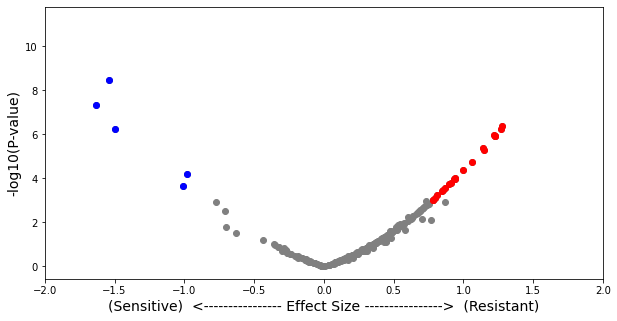

In [82]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt
import numpy as np
x_lim = 2
fig= plt.figure(figsize=(10,5))
plt.plot(-1 * x_lim, 0, x_lim, 5)
plt.xlim(-1 * x_lim, x_lim) 
plt.xlabel("(Sensitive)  <---------------- Effect Size ---------------->  (Resistant)", fontsize=14)
plt.ylabel("-log10(P-value)",fontsize=14)
    
plt.scatter(result_df[X_forVocanno], -1 * np.log(result_df[Y_forVocanno]), color = 'grey')

result_sig_df = result_df.loc[result_df[Y_forVocanno] < threshhold_p]
result_sig_sensitive = result_sig_df.loc[result_sig_df[X_forVocanno] < threshhold_x]
result_sig_resistance = result_sig_df.loc[result_sig_df[X_forVocanno] > threshhold_x]

plt.scatter(result_sig_resistance[X_forVocanno], -1 * np.log(result_sig_resistance[Y_forVocanno]), color = 'red')
plt.scatter(result_sig_sensitive[X_forVocanno], -1 * np.log(result_sig_sensitive[Y_forVocanno]), color = 'blue')



In [83]:
result_sig_sensitive.sort_values(by = ['edge_confidence_p'])


,subject_id,subject_symbol,subject_type,object_id,object_name,object_type,edge_label,edge_context_disease,edge_confidence_p,edge_effect_size,edge_median_ic50_wt,edge_median_ic50_mut,edge_confidence_sample_size,edge_confidence_mut_size,edge_confidence_wt_size
157,1956,EGFR,Gene,PUBCHEM:57519523,Afatinib,ChemicalSubstance,related_to,MONDO:0005061,0.000013,-2.180000,1.189939,-2.102841,63,6,46
172,1956,EGFR,Gene,PUBCHEM:57519523,Afatinib,ChemicalSubstance,related_to,MONDO:0005061,0.000210,-1.543094,3.587552,0.063640,63,8,51
135,1956,EGFR,Gene,PUBCHEM:5328940,Bosutinib,ChemicalSubstance,related_to,MONDO:0005061,0.000640,-1.631858,2.224012,0.115983,63,6,46
185,1956,EGFR,Gene,PUBCHEM:123631,Gefitinib,ChemicalSubstance,related_to,MONDO:0005061,0.001952,-1.497063,1.308749,-0.110006,63,6,46
105,1956,EGFR,Gene,CHEMBL.COMPOUND:CHEMBL1201577,Cetuximab,ChemicalSubstance,related_to,MONDO:0005061,0.014810,-0.983622,6.086464,5.087846,63,8,50
16,1956,EGFR,Gene,PUBCHEM:65110,AICAR,ChemicalSubstance,related_to,MONDO:0005061,0.026293,-1.009638,8.142657,7.241722,63,6,46


In [84]:
result_sig_resistance.sort_values(by = ['edge_confidence_p'])

,subject_id,subject_symbol,subject_type,object_id,object_name,object_type,edge_label,edge_context_disease,edge_confidence_p,edge_effect_size,edge_median_ic50_wt,edge_median_ic50_mut,edge_confidence_sample_size,edge_confidence_mut_size,edge_confidence_wt_size
3,1956,EGFR,Gene,PUBCHEM:49766501,KIN001-244,ChemicalSubstance,related_to,MONDO:0005061,0.001726,1.274831,3.742272,5.163729,63,8,52
201,1956,EGFR,Gene,PUBCHEM:24951314,CAY10603,ChemicalSubstance,related_to,MONDO:0005061,0.001962,1.267002,1.049310,2.661095,63,8,52
203,1956,EGFR,Gene,PUBCHEM:4263900,QS11,ChemicalSubstance,related_to,MONDO:0005061,0.002596,1.217161,3.503580,4.943327,63,8,50
131,1956,EGFR,Gene,PUBCHEM:42642645,XL-880,ChemicalSubstance,related_to,MONDO:0005061,0.002629,1.226950,0.687281,1.732947,63,8,52
171,1956,EGFR,Gene,PUBCHEM:6918848,AR-42,ChemicalSubstance,related_to,MONDO:0005061,0.002718,1.226870,-0.158540,1.449670,63,8,52
154,1956,EGFR,Gene,name:THZ-2-49,THZ-2-49,ChemicalSubstance,related_to,MONDO:0005061,0.004694,1.137544,2.727048,4.202931,63,8,52
223,1956,EGFR,Gene,PUBCHEM:11178236,YM155,ChemicalSubstance,related_to,MONDO:0005061,0.004941,1.144857,-4.867469,-2.778431,63,8,52
30,1956,EGFR,Gene,PUBCHEM:53437714,PXD101,ChemicalSubstance,related_to,MONDO:0005061,0.008801,1.059463,0.478425,1.973528,63,8,52
222,1956,EGFR,Gene,CHEBI:72317,XL-184,ChemicalSubstance,related_to,MONDO:0005061,0.012543,0.994808,2.960860,4.426457,63,8,52
161,1956,EGFR,Gene,PUBCHEM:6852167,PIK-93,ChemicalSubstance,related_to,MONDO:0005061,0.018377,0.938562,3.290015,4.178305,63,8,52
